In [39]:
conda install -c conda-forge basemap

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [40]:
conda install -c conda-forge plotly

Solving environment: done

## Package Plan ##

  environment location: /Users/home/opt/anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-5.7.0               |     pyhd8ed1ab_0         6.9 MB  conda-forge
    tenacity-8.0.1             |     pyhd8ed1ab_0          21 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.9 MB

The following NEW packages will be INSTALLED:

  plotly             conda-forge/noarch::plotly-5.7.0-pyhd8ed1ab_0
  tenacity           conda-forge/noarch::tenacity-8.0.1-pyhd8ed1ab_0



tenacity-8.0.1       | 21 KB     | ##################################### | 100% 
plotly-5.7.0         | 6.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

In [55]:

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import os
os.environ['PROJ_LIB'] = '/Users/sindhuri/anaconda3/envs/worklab/share/proj'

import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')   
from mpl_toolkits.basemap import Basemap as Basemap

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode


#from shapely.geometry import Point, MultiPoint
#from ipywidgets import interact, widgets
#from IPython.display import display

In [56]:
df = pd.read_csv(r'/Users/home/Desktop/Spring-2022/MIS 6346 - BigData/Project/country_wise_latest.csv')
df = df.replace('', np.nan).fillna(0)
#df.head(10)

In [69]:
## fetch dealth/confirmed ratio
df['death/confirmed'] = (df['Deaths']/df['Confirmed'])*100
## Sorting and get top 10 countries
df.sort_values(by=['death/confirmed'], inplace=True, ascending=False)
#print(df[['Country/Region', 'WHO Region', 'Confirmed', 'Deaths', 'Recovered', 'death/confirmed']].head(10))

In [84]:
df = pd.read_csv(r'/Users/home/Desktop/Spring-2022/MIS 6346 - BigData/Project/country_wise_latest.csv')
df['death/confirmed'] = (df['Deaths']/df['Confirmed'])*100
#print(df.head(10))
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Country/Region", color='WHO Region',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()
    
plot_hbar(df, 'death/confirmed', 15)

In [59]:
## get list of unique regions
list_region = df['WHO Region'].unique()
print(list_region)

['Eastern Mediterranean' 'Europe' 'Americas' 'Africa' 'Western Pacific'
 'South-East Asia']


In [60]:
## get region wise death/confirmed ration percentage
list_sum_ratio = []
for each_region in list_region:
    denominator = df.loc[df['WHO Region'] == each_region, 'Confirmed'].sum()
    numerator = df.loc[df['WHO Region'] == each_region, 'Deaths'].sum()
    sum_ratio = (numerator/denominator)*100
    list_sum_ratio.append(sum_ratio)
    print(each_region,'---->', sum_ratio)
   

Eastern Mediterranean ----> 2.5718030728280645
Europe ----> 6.399228009624422
Americas ----> 3.8773719958829256
Africa ----> 1.690110853462425
Western Pacific ----> 2.820865307015744
South-East Asia ----> 2.252986846270658


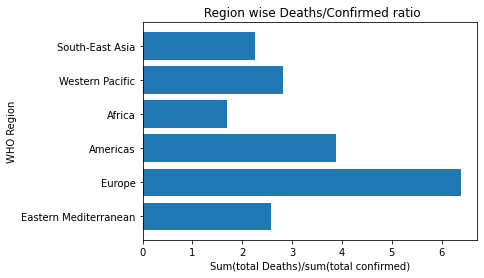

In [61]:
x =  list_sum_ratio
y = list_region
plt.barh(y, x)
 
# setting x-label
plt.xlabel("Sum(total Deaths)/sum(total confirmed)")
 
# setting y_label
plt.ylabel("WHO Region")  
plt.title(" Region wise Deaths/Confirmed ratio")
plt.show()

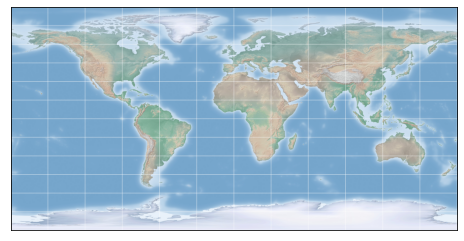

In [62]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

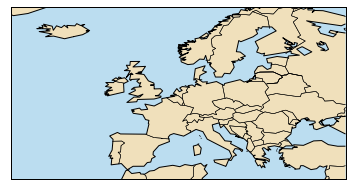

In [63]:
#m=Basemap()
#Europe
m=Basemap(llcrnrlat=34, urcrnrlat=70, llcrnrlon=-30, urcrnrlon=40)
#South-Asia

# Show the coast lines
m.drawcoastlines()
m.drawcountries()
m.drawstates()

m.fillcontinents(color='#F0E0BB', lake_color='#BBDDF0')
m.drawmapboundary(fill_color='#BBDDF0')
m.drawcountries(linewidth=0.5)


# data
Region = list_region
val = list_sum_ratio
#m.scatter(Region,zorder=2, latlon=True, c=val, cmap='summer')

plt.show()

### From above 2 queries-- we see Europe is most infected region based on deaths/confirmed ratio

In [64]:
## 1 week % increase country wise - top 10
df.sort_values(by=['1 week % increase'], inplace=True, ascending=False)
#print(df[['Country/Region', 'WHO Region', 'Confirmed last week', '1 week change', '1 week % increase']].head(10))

In [83]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode

df = pd.read_csv(r'/Users/home/Desktop/Spring-2022/MIS 6346 - BigData/Project/country_wise_latest.csv')
df['death/confirmed'] = (df['Deaths']/df['Confirmed'])*100
#print(df.head(10))
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Country/Region", color='WHO Region',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()
    
plot_hbar(df, '1 week % increase', 15)

In [66]:
## get region wise 1 week % change percentage
list_change_ratio = []
for each_region in list_region:
    denominator = df.loc[df['WHO Region'] == each_region, 'Confirmed last week'].sum()
    numerator = df.loc[df['WHO Region'] == each_region, '1 week change'].sum()
    change_ratio = (numerator/denominator)*100
    list_change_ratio.append(change_ratio)
    print(each_region,'---->', change_ratio)

Eastern Mediterranean ----> 6.569481866136898
Europe ----> 4.852746395086335
Americas ----> 13.103801080919512
Africa ----> 18.925047687956326
Western Pacific ----> 9.78716694386148
South-East Asia ----> 24.15058551035221


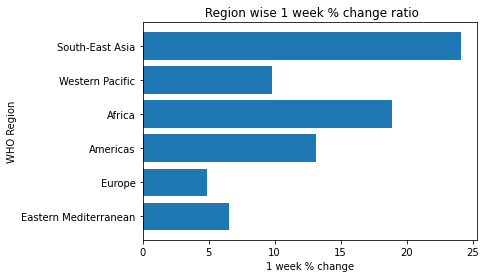

In [67]:
x =  list_change_ratio
y = list_region
plt.barh(y, x)
 
# setting x-label
plt.xlabel("1 week % change")
 
# setting y_label
plt.ylabel("WHO Region")  
plt.title(" Region wise 1 week % increase ratio")
plt.show()

### From above 2 queries-- we see South-East Asia has more increase in cases count based on  1 week % change ratio 

In [88]:
## heat map representation

def plot_treemap(col):
    fig = px.treemap(df, path=["Country/Region"], values=col, height=700,
                 title=col, color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()


In [89]:
plot_treemap('death/confirmed')

In [90]:
plot_treemap('1 week % increase')

In [94]:
world_fig = px.scatter(df.sort_values('Deaths', ascending=False).iloc[:20, :], 
                 x='Confirmed', y='Deaths', color='Country/Region', size='Confirmed', 
                 height=700, text='Country/Region', log_x=True, log_y=True, 
                 title='Deaths vs Confirmed (Scale in log10)')
world_fig.update_traces(textposition='top center')
world_fig.update_layout(showlegend=False)
world_fig.update_layout(xaxis_rangeslider_visible=True)
world_fig.show()

/var/folders/35/wyk1rx_x38g3crfd0y5mcmnc0000gn/T/ipykernel_9494/237505245.py:23: UserWarning:

FixedFormatter should only be used together with FixedLocator



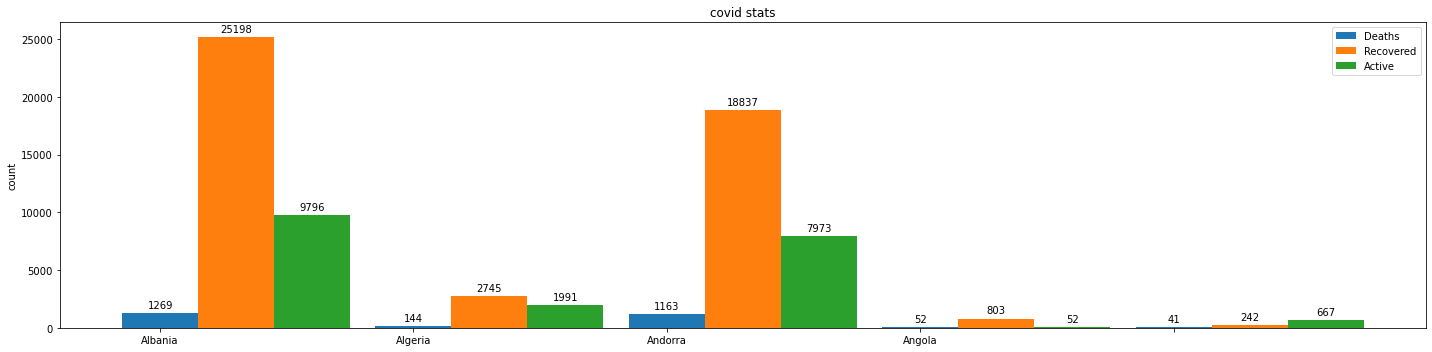

In [122]:
import matplotlib.pyplot as plt
import numpy as np

#print(df.head(5))
labels = df['Country/Region'].head(5)
a1 = df['Deaths'].head(5)
a2 = df['Recovered'].head(5)
a3 = df['Active'].head(5)


x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(20, 5))
rects1 = ax.bar(x, a1, width, label='Deaths')
rects2 = ax.bar(x +width, a2, width, label='Recovered')
rects3 = ax.bar(x+ 2*(width),a3, width, label='Active') 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('covid stats')
#ax.set_ticks(x, labels)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()